In [ ]:
function accuracy()
    ac=700;
    return ac;
end
setprecision(accuracy());

In [ ]:
function order()
    M=80;
    return M+1;
end

In [ ]:
function steps()
    h = BigFloat(1)/BigFloat(10)
    return h;
end

In [ ]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

In [ ]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

In [ ]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()/BigFloat(i)
    end
    
    return S
end

In [ ]:
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 

In [ ]:
function Sumuvw(x,z,u,w,Cki)
    return sum(fdot(Cki[1:end],reverse!(w[1:end]),x[1:end])) + sum(fdot(Cki[1:end],reverse!(z[1:end]),u[1:end]))
end 

In [ ]:
"""function Sumuvw(x,z,u,w,Cki)
    #println(convert(Float16,(log10(abs(sum(Cki.*x.*reverse!(w)))))))
    return sum(Cki.*u.*reverse!(z)) + sum(Cki.*x.*reverse!(w))
end 
"""

In [ ]:
function Talor(x,y,z,u,v,w,Cki)
    for k in 1:order()-1
        
        #println(k,": ",convert.(Float16,log10.([abs(x[k]),abs(y[k]),abs(z[k])])))
        #println(convert(Float16,(log10(abs(w[k])))))
        #println("====")
        
        x[k+1] = -y[k] - z[k]
        y[k+1] = x[k] + a*y[k]
        z[k+1] = b - c*z[k] + Sumxyz(x[1:k],z[1:k],Cki[k,1:k])
        
        u[k+1] = -v[k] - w[k]
        v[k+1] = u[k] + a*v[k]
        w[k+1] = - c*w[k] + Sumuvw(x[1:k],z[1:k],u[1:k],w[1:k],Cki[k,1:k])
    end
    
    return x,y,z,u,v,w
end

In [ ]:
function Iteration(x,y,z,u,v,w,Cki)
    
    for st in 1:Times
    
        x,y,z,u,v,w = Talor(x,y,z,u,v,w,Cki)
        
        x[1] = sum(x[1:end].*Dmulti[1:end])
        y[1] = sum(y[1:end].*Dmulti[1:end])
        z[1] = sum(z[1:end].*Dmulti[1:end])
        
        u[1] = sum(u[1:end].*Dmulti[1:end])
        v[1] = sum(v[1:end].*Dmulti[1:end])
        w[1] = sum(w[1:end].*Dmulti[1:end])
    
        Lorenz[st,:] = [x[1],y[1],z[1]] 
        Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
        
        Ep[st] = (log10(abs(u[1]))+log10(abs(v[1]))+log10(abs(w[1])))/3 
      
        if mod(st,2000) == 0
            println(st,") ","time=",convert(Float16,st*steps()),": ",convert(Float16,Ep[st])," ",Lorenzf[st,:])
        end
    end
    
    return Lorenz,Ep
    
end

In [ ]:
Times = 15000;      

a =  BigFloat(3)/BigFloat(20);
b =  BigFloat(2)/BigFloat(10);
c =  BigFloat(10)

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())
u = Array{BigFloat}(undef,order())
v = Array{BigFloat}(undef,order())
w = Array{BigFloat}(undef,order())
Lorenz = Array{BigFloat}(undef,Times,3);
HH = Array{BigFloat}(undef,Times,3);
Ep = Array{BigFloat}(undef,Times,1);
Lorenzf = Array{Float32}(undef,Times,3);
Dmulti = Array{BigFloat}(undef,1,order());
Cki = Array{BigFloat}(undef,order()-1,order()-1);

x[1] = BigFloat(1); 
y[1] = BigFloat(2); 
z[1] = BigFloat(3);

mep = BigFloat(10)^BigFloat(-70)
u[1] = mep
v[1] = mep
w[1] = mep

Cki = DJCh();
Dmulti = multi();

In [ ]:
HH,Ep = Iteration(x,y,z,u,v,w,Cki);

In [ ]:
using Plots; 
plot(1:Times,Ep[1:end])

In [ ]:
sk = 0
sn = 0
for i in range(15000,Times,step=2000)
    sk = sk + (Ep[i]-Ep[1])/((i-1)*steps())
    sn = sn + 1
end
sk/sn

In [ ]:
plot(HH[1:end,1],HH[1:end,2],HH[1:end,3])

In [ ]:
Tinf = 1000
ep = BigFloat(10)^(-10-0.0375*Tinf)

In [ ]:
function steps2()
    h = BigFloat(1)/BigFloat(50)
    return h;
end
function order2()
    M=40;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = -y[k] - z[k]
        y[k+1] = x[k] + a*y[k]
        z[k+1] = b - c*z[k] + Sumxyz(x[1:k],z[1:k],Cki[k,1:k])
    
    end
    
    return x,y,z
end

a =  BigFloat(3)/BigFloat(20);
b =  BigFloat(2)/BigFloat(10);
c =  BigFloat(10)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = BigFloat(1); 
y[1] = BigFloat(2); 
z[1] = BigFloat(3);


x,y,z = Talor2(x,y,z,Cki)
m = x[end]*Dmulti[end] + y[end]*Dmulti[end] +z[end]*Dmulti[end]
println(convert(Float16,log10(abs(m))))

In [ ]:
#收敛半径R
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(10000)
    return h;
end
function order2()
    M=10000;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = -y[k] - z[k]
        y[k+1] = x[k] + a*y[k]
        z[k+1] = b - c*z[k] + Sumxyz(x[1:k],z[1:k],Cki[k,1:k])
    
    end
    
    return x[2:end]./x[1:end-1],y[2:end]./y[1:end-1],z[2:end]./z[1:end-1]
end

a =  BigFloat(3)/BigFloat(20);
b =  BigFloat(2)/BigFloat(10);
c =  BigFloat(10)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2()-1)
y1 = Array{BigFloat}(undef,order2()-1)
z1 = Array{BigFloat}(undef,order2()-1)
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = BigFloat(1); 
y[1] = BigFloat(2); 
z[1] = BigFloat(3);

for i in 1:order2()-1
    Shun[i] = i+1
end

x1,y1,z1 = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
y1 = y1[1:end]./Shun[1:end]
using Plots; 
plot(1:order2()-1,y1)

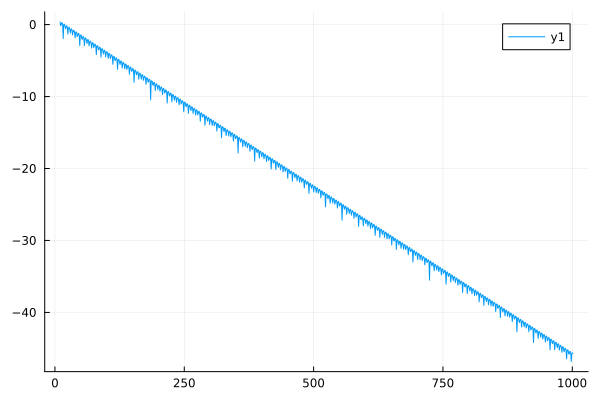

In [22]:
#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(2)
    return h;
end
function order2()
    M=1000;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = -y[k] - z[k]
        y[k+1] = x[k] + a*y[k]
        z[k+1] = b - c*z[k] + Sumxyz(x[1:k],z[1:k],Cki[k,1:k])
    
    end
    
    return x,y,z
end

a =  BigFloat(3)/BigFloat(20);
b =  BigFloat(2)/BigFloat(10);
c =  BigFloat(10)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2())
y1 = Array{BigFloat}(undef,order2())
z1 = Array{BigFloat}(undef,order2())
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = BigFloat(1); 
y[1] = BigFloat(2); 
z[1] = BigFloat(3);

for i in 1:order2()-1
    Shun[i] = i+1
end

x,y,z = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
x1 = x[1:end].*Dmulti[1:end]
y1 = y[1:end].*Dmulti[1:end]
z1 = z[1:end].*Dmulti[1:end]
using Plots; 
plot(10:order2(),log10.(abs.(x1[10:end])))

In [ ]:
"""#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)
    return h;
end
function order2(m)
    M=m;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2(m)-1,order2(m)-1);
    for k in 1:order2(m)-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2(m)-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2(m));
    S[1] = BigFloat(1)
    
    for i in 1:order2(m)-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2(m)-1
        
        x[k+1] = -y[k] - z[k]
        y[k+1] = x[k] + a*y[k]
        z[k+1] = b - c*z[k] + Sumxyz(x[1:k],z[1:k],Cki[k,1:k])
    
    end
    
    return x[end],y[end],z[end]
end

a =  BigFloat(3)/BigFloat(20);
b =  BigFloat(2)/BigFloat(10);
c =  BigFloat(10)
m = 1

up=50
for i in 1:up
m=100*i

x = Array{BigFloat}(undef,order2(m))
y = Array{BigFloat}(undef,order2(m))
z = Array{BigFloat}(undef,order2(m))
x1 = Array{BigFloat}(undef,up)
y1 = Array{BigFloat}(undef,up)
z1 = Array{BigFloat}(undef,up)

Dmulti = Array{BigFloat}(undef,1,order2(m));
Cki = Array{BigFloat}(undef,order2(m)-1,order2(m)-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = BigFloat(1); 
y[1] = BigFloat(2); 
z[1] = BigFloat(3);

a1,b1,c1 = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
    x1[i] = a1*Dmulti[end]
    y1[i] = b1*Dmulti[end]
    z1[i] = c1*Dmulti[end]
    println(i,") ",convert(Float16,log10(abs(x[i]))))
    
end
using Plots; 
plot(1:up,x1)